# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Understanding the structure of the data

In [2]:
# read the data
df = pd.read_csv(r'C:\Users\tarachand.sahoo\Personal\DataScience\MIT Course\Week2\FoodHub Project Submission\foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [3]:
# Get the shape of the Dataframe df
print("There are",df.shape[0],"rows and",df.shape[1],"columns in the sample dataset")

There are 1898 rows and 9 columns in the sample dataset


#### Observations:

There are 1898 rows and 9 columns in the sample dataset


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [4]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

 There are **nine** columns with the following details:
   * 1. **order_id, customer_id, food_preparation_time, delivery_time columns** has **no missing** values with **integer datatype.**
   * 2. **cost_of_the_order** column has **no missing** values with **float datatype.**
   * 3. **restaurant_name, cuisine_type, day_of_the_week and rating** has **no missing** values with **object datatype.**
    

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [5]:
# Check total null values
print("Null Rows : ","\n","\n", 
      df.isnull().sum(),"\n","\n", sep="")
print("No. of duplicate Rows :", df.duplicated().sum())

Null Rows : 

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


No. of duplicate Rows : 0


#### Observations:

 * There are **no** missing values in any of the nine columns.
 * There are **no** duplicate rows either.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [6]:
# Get the data stats by describing the Dataframe
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


#### Observations:

#### Statustical Summary of Data are as follows:
* Order_id: The Total number of oders
* resturant_name: There are 178 resturants and the most popular restuant is Shake Shack
* cusine_type: There 14 different types of cusinie available, most popular is American 
* cost_of_the_order: The cost of the order range between 7.5 USD to 35 USD with average cost of 16.5 USD
* day_of_the_week: Most of the food order are recived during the Weekend
* rating: Most common rating is 4 however majority of orders are not rated.
* delivery_time: minimum 15 minutes, average is 24.17 minutes and maximum delivery time is 33 minutes
    
* **food_preparation_time**: **minimum 20 minutes, average is 27.38 minutes and maximum delivery time is 35 minutes**
    
    

### **Question 5:** How many orders are not rated? [1 mark]

In [7]:
# Check the different values for ratings column and their individual counts
orders_not_rated = len(df[df['rating']=='Not given'])
print("The number of orders that are not rated are ",orders_not_rated, sep="")

The number of orders that are not rated are 736


#### Observations:

** There are 736 orders for which No Ratings were provided**


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

## order_id

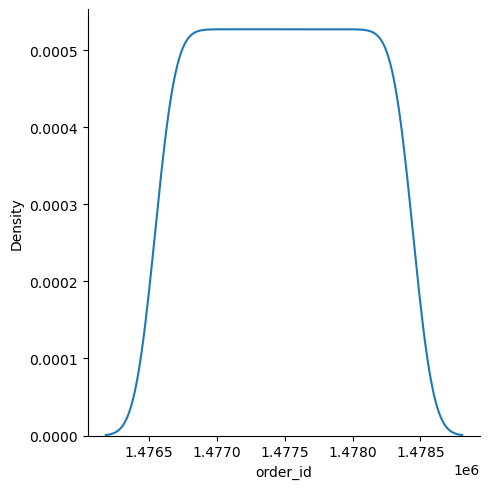

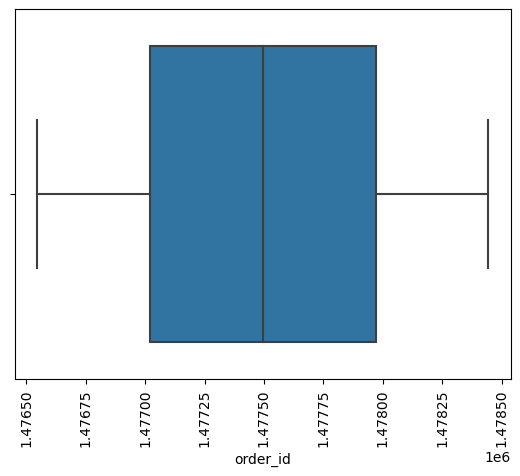

In [8]:
# Analyse data distribution for each column in the data to describe the observations
# let's analyze the column order_id
sns.displot(data=df, x='order_id', kind='kde')
plt.show()
plt.xticks(rotation =90)
sns.boxplot(data=df, x='order_id');
plt.show()

#### Observations

* Normal data distribution found
* No data abnormality found

## customer_id

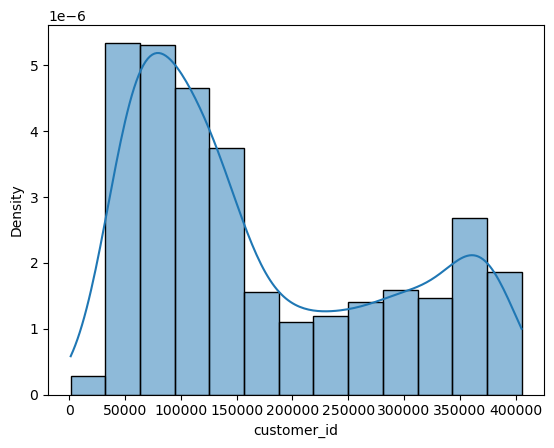

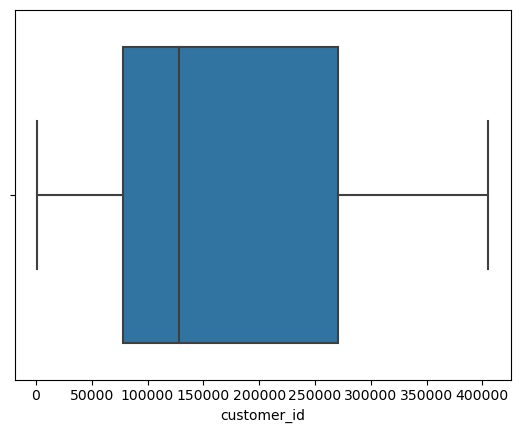

In [9]:
# let's analyze the column customer_id
#plt.xticks(rotation =90)
sns.histplot(data=df, x='customer_id', stat='density', kde=True );
plt.show()
#plt.xticks(rotation =90)
sns.boxplot(data=df, x='customer_id');
plt.show()


#### Observations

* Data distribution is bi-modal
* Data is little skewed to right.
* No ouliers found

## restaurant_name

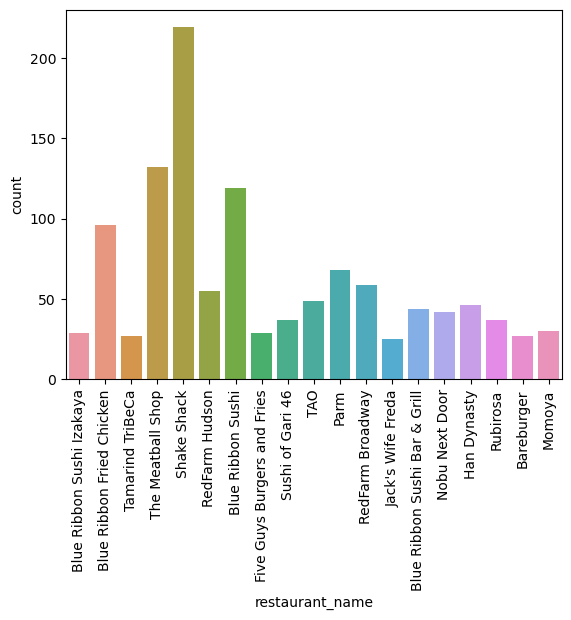

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64

In [10]:
# let's analyze the column restaurant_name
#Since there are 178 resturants it is difficult to see all of them clearly in the bar graph. so weanalyzed the most popular ones
top_restaurants = df[df['restaurant_name'].isin(df['restaurant_name'].value_counts()[df['restaurant_name'].value_counts()>=25].index)].restaurant_name
sns.countplot(data=df, x=top_restaurants)
plt.xticks(rotation =90)
plt.show()

df['restaurant_name'].value_counts()

#### Observations

* Since there are 178 resturants it is difficult to see all of them clearly in the bar graph. so we analyzed the most popular ones
* Shake Shack is very popular with the highest frequency of 219.

### cuisine_type

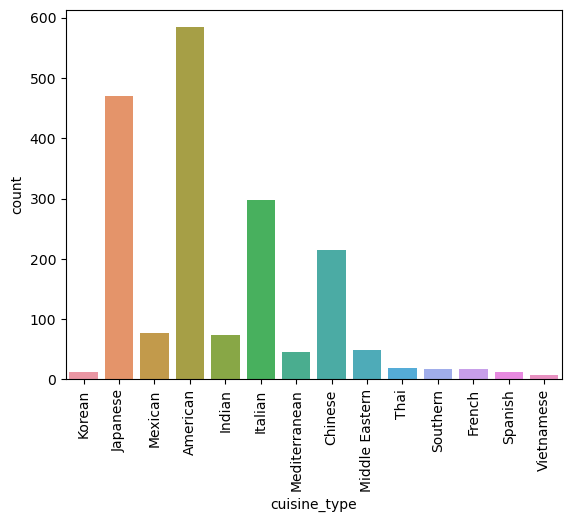

American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: cuisine_type, dtype: int64

In [11]:
# let's analyze the column cuisine_type
sns.countplot(data=df, x='cuisine_type')
plt.xticks(rotation =90)
plt.show()

df['cuisine_type'].value_counts()

#### Observations

* There are 14 different types of cuisines avaialable across different restuarants.
* American is very popular with the highest frequency of 584, followed by Japanese, Italian & Chinese.

### cost_of_the_order

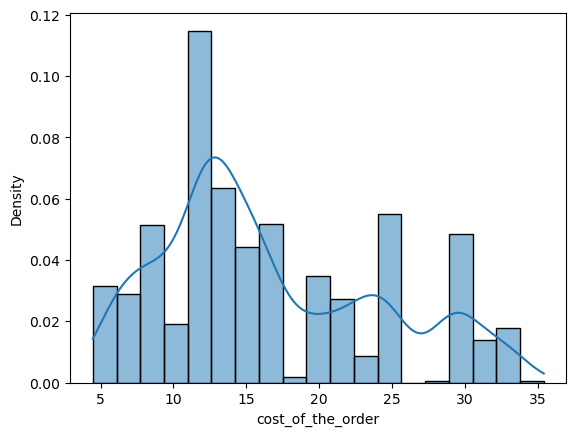

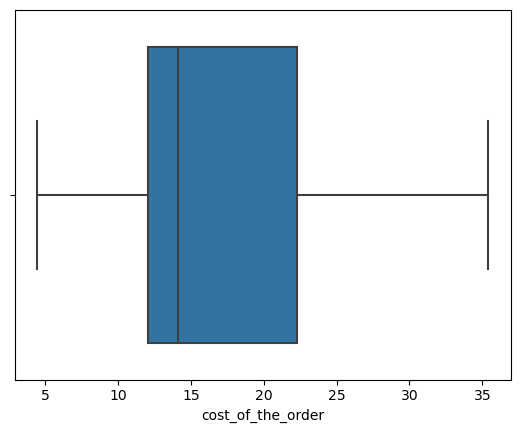

In [12]:
# let's analyze the column cost_of_the_order
sns.histplot(data=df, x='cost_of_the_order', stat='density', kde=True );
plt.show()
sns.boxplot(data=df, x='cost_of_the_order');
plt.show()


#### Observations

* The Data ranges from lower 5 USD to max 35 USD with an averave cost of 16.50 USD.
* Data is little skewed to right.
* No ouliers found

### day_of_the_week

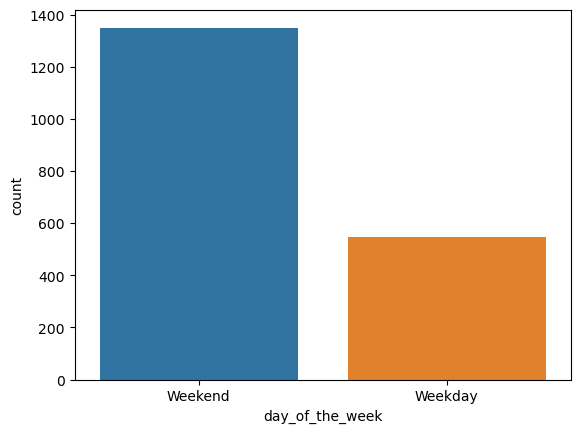

Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64

In [13]:
# let's analyze the column day_of_the_week

sns.countplot(data=df, x='day_of_the_week')
plt.show()

df['day_of_the_week'].value_counts()

#### Observations

* Most of the food orders around 71 percent happen during the Weekends.
* However there is a big opportunity in generating the Weekday's orders

### rating

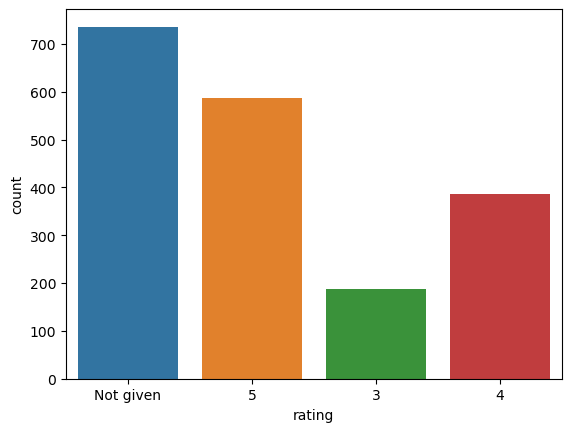

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

In [14]:
# let's analyze the column rating
sns.countplot(data=df, x='rating')
plt.show()

df['rating'].value_counts()

#### Observations

* There are only 3 types of actual rating for 5, 4, 3.
* Majority of food rating is not given so around 39%.
* 31% got a 5 rating, 20% got a 4 rating & remaing 10% got a 3 rating.


### food_preparation_time

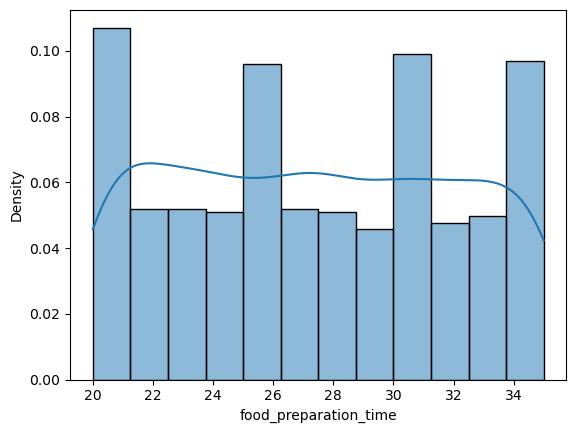

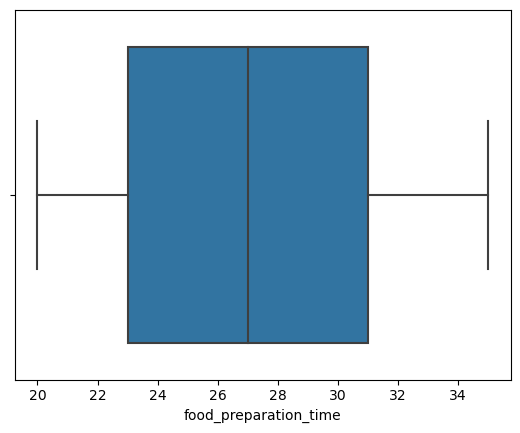

In [15]:
# let's analyze the column food_preparation_time
sns.histplot(data=df, x='food_preparation_time', stat='density', kde=True );
plt.show()
sns.boxplot(data=df, x='food_preparation_time');
plt.show()

#### Observations
* No Skewness observed in the data distribution
* The Data ranges from lower 20 minutes to max 35 minutes with an averave food preparation time of 27 minutes.
* No outliers found

#### delivery_time

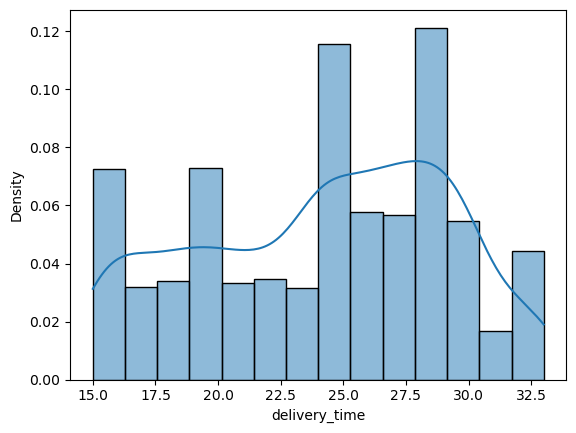

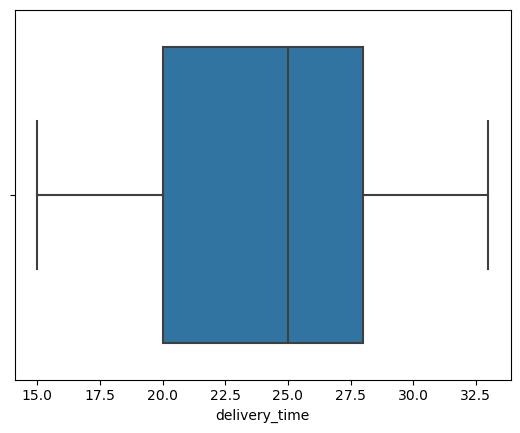

In [16]:
# let's analyze the column delivery_time
sns.histplot(data=df, x='delivery_time', stat='density', kde=True );
plt.show()
sns.boxplot(data=df, x='delivery_time');
plt.show()

#### Observations

* The Data ranges from lower 15 minutes to max 33 minutes with an averave food delivery time of 24.17 minutes.
* Data is little skewed to left.
* No ouliers found

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [17]:
df.groupby(['restaurant_name'])['order_id'].count().sort_values(ascending=False).head(5)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: order_id, dtype: int64

#### Observations:

*The top 5 restaurants in terms of the number of orders received are as follows:
    
**Shake Shack**                  219,
**The Meatball Shop**            132,
**Blue Ribbon Sushi**            119,
**Blue Ribbon Fried Chicken**     96,
**& Parm**                          68


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [18]:
df.loc[df['day_of_the_week']=='Weekend', 'cuisine_type'].value_counts().sort_values(ascending=False).head(1)

American    415
Name: cuisine_type, dtype: int64

#### Observations:

* Most popular cuisine on weekends is **American**


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [19]:
cost_more_than_20 = df[df['cost_of_the_order']>20]
print("The percentage of the orders cost more than 20 dollars is ", round((cost_more_than_20.shape[0] / df.shape[0])*100, 2),'%', sep="")


The percentage of the orders cost more than 20 dollars is 29.24%


#### Observations:
The percentage of the orders cost more than 20 dollars is **29.24%**

### **Question 10**: What is the mean order delivery time? [1 mark]

In [20]:
# Write the code here
print('The mean delivery time for this dataset is',round(df['delivery_time'].mean(),2),"minutes")


The mean delivery time for this dataset is 24.16 minutes


#### Observations:

The mean delivery time for this dataset is **24.16** minutes


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [21]:
# Write the code here
top_3_customer= df['customer_id'].value_counts().head(3)
print("The Top 3 customer and their orders placed are as follows:","\n",top_3_customer, sep="")

The Top 3 customer and their orders placed are as follows:
52832    13
47440    10
83287     9
Name: customer_id, dtype: int64


#### Observations:


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


#### Analyze various cusine types with Cost of order 

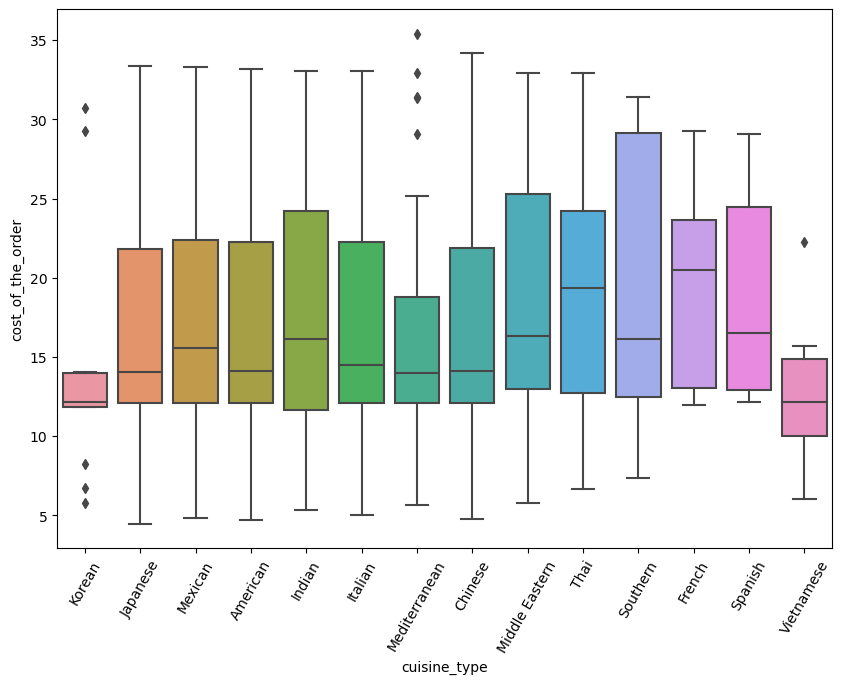

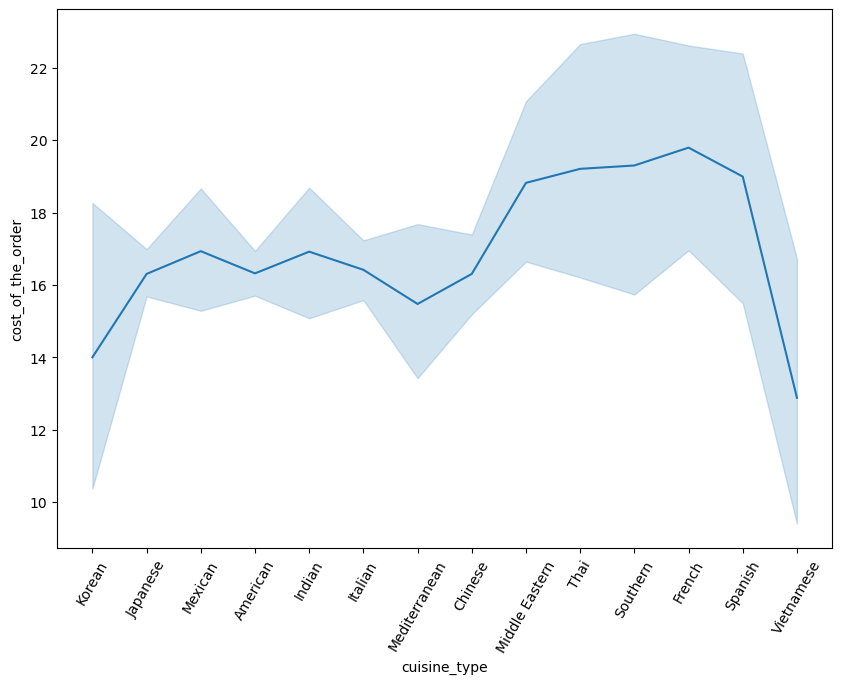

In [22]:
plt.figure(figsize=(10,7))
sns.boxplot(data = df, x = "cuisine_type", y = "cost_of_the_order")
plt.xticks(rotation = 60)
plt.show()

plt.figure(figsize=(10,7))
sns.lineplot(data=df, x = "cuisine_type", y = "cost_of_the_order" )
plt.xticks(rotation = 60)
plt.show()

#### Observations

* Outliers detected in the cost of food for Korean, Mediterranean & Vietnamese cuisines.
* Cost wise the most economical cuisines are Korean & Vietnamese & expensive is Southern & French overall.


#### Analyze various cusine types with food preparation time

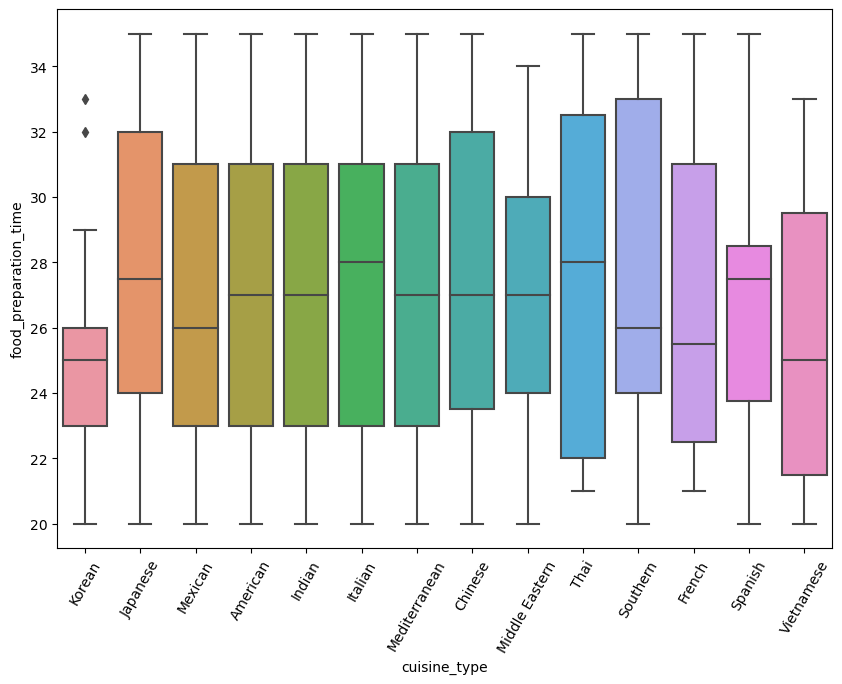

In [23]:
plt.figure(figsize=(10,7))
sns.boxplot(data = df, x = "cuisine_type", y = "food_preparation_time")
plt.xticks(rotation = 60)
plt.show()


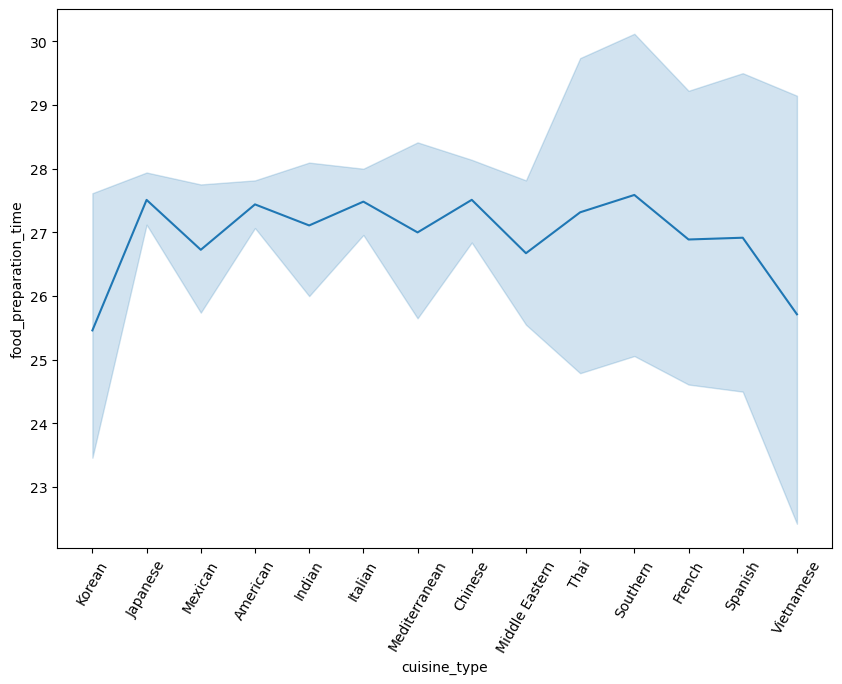

In [24]:
plt.figure(figsize=(10,7))
sns.lineplot(data=df, x = "cuisine_type", y = "food_preparation_time" )
plt.xticks(rotation = 60)
plt.show()

#### Observations

* Outliers detected in the food preparation time for Korean.
* food preparation time wise the quickest cuisines are Korean & Vietnameseagain & longest are Thai & southern overall.

#### Analyze Day of the Week with delivery time

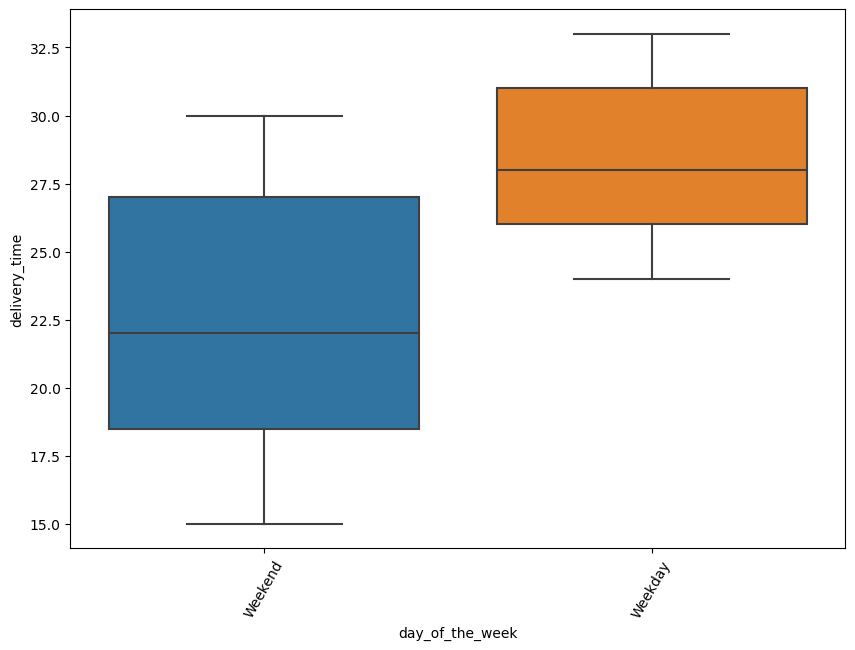

In [25]:
plt.figure(figsize=(10,7))
sns.boxplot(data = df, x = "day_of_the_week", y = "delivery_time")
plt.xticks(rotation = 60)
plt.show()


#### Observations

* Weekdays have longer delivery time compared to Weekends

#### Analyze rating of the order with delivery time

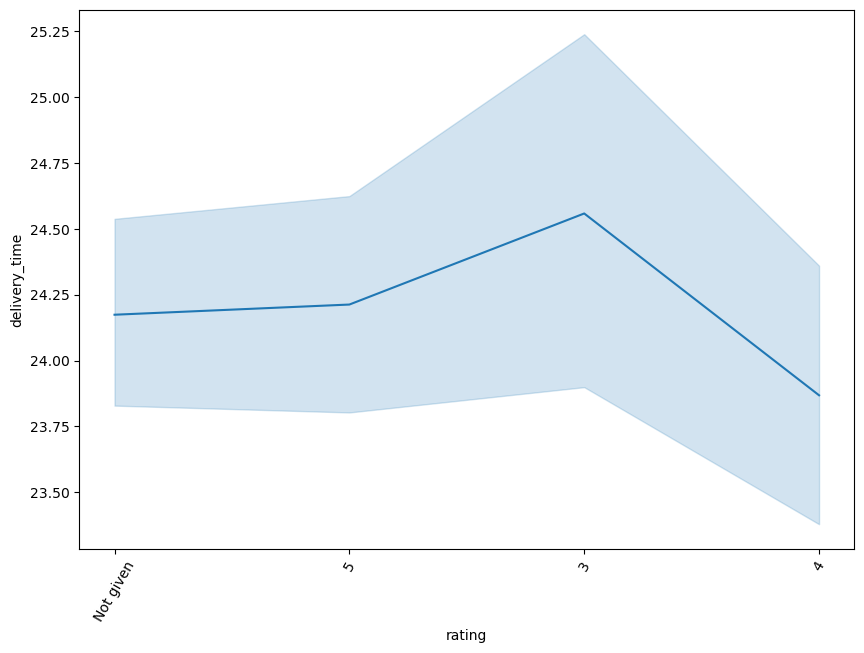

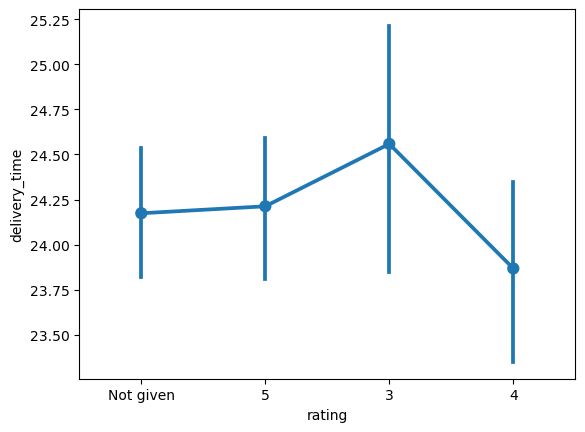

In [26]:
plt.figure(figsize=(10,7))
sns.lineplot(data=df, x = "rating", y = "delivery_time" )
plt.xticks(rotation = 60)
plt.show()

sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()


#### Observations

* Rating increases when delivery time goes down below 24 minutes


#### Analyze rating of the order with food preparation time

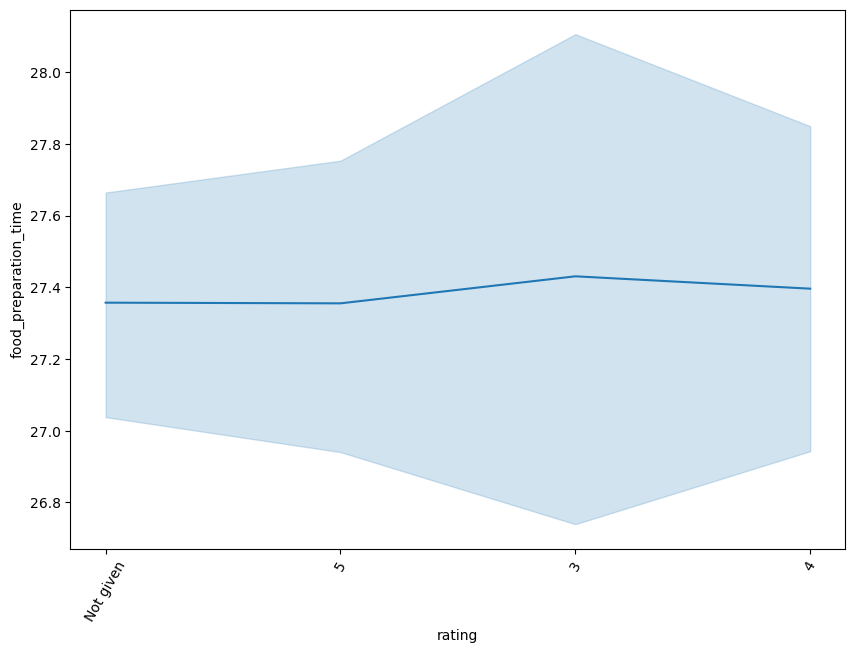

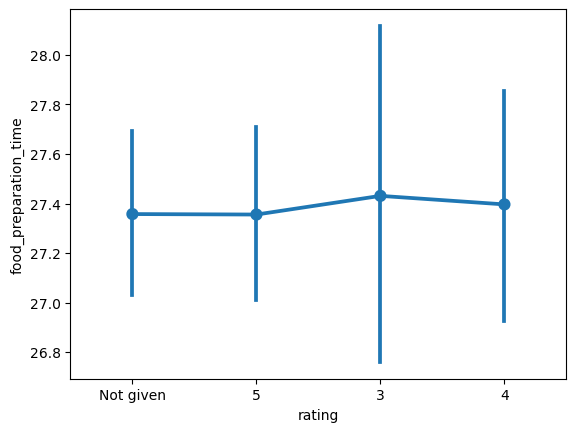

In [27]:
plt.figure(figsize=(10,7))
sns.lineplot(data=df, x = "rating", y = "food_preparation_time" )
plt.xticks(rotation = 60)
plt.show()

sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df)
plt.show()


#### Observations

* Rating increases when food preparation time goes down below 27.4 minutes

#### Analyze rating of the order with cost of the order

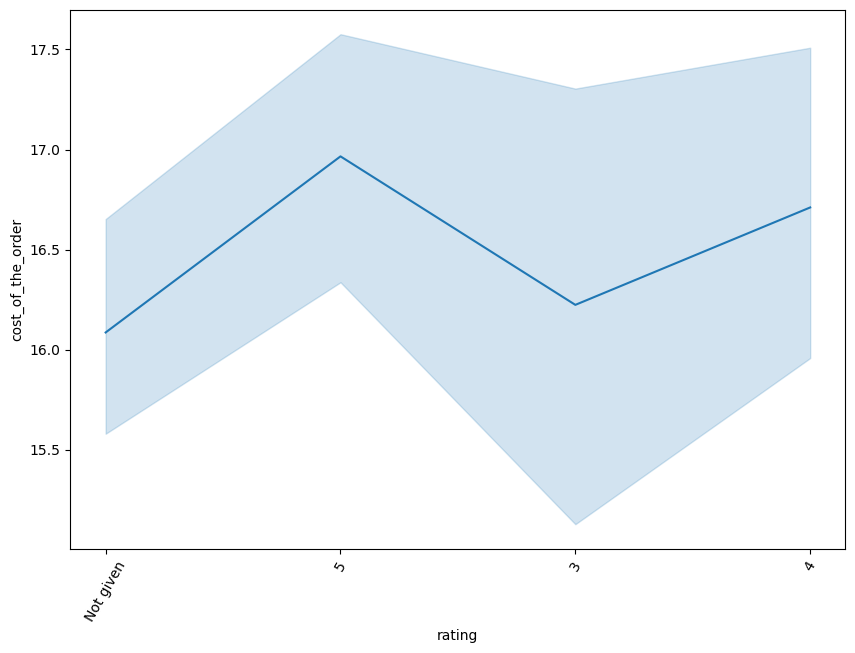

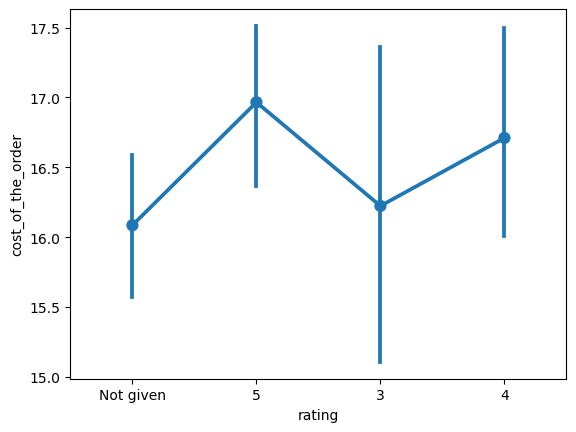

In [28]:
plt.figure(figsize=(10,7))
sns.lineplot(data=df, x = "rating", y = "cost_of_the_order" )
plt.xticks(rotation = 60)
plt.show()

sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = df)
plt.show()


#### Observations

* No dependency found between rating & cost_of_the_order data

#### Analyze the correlation between all variables

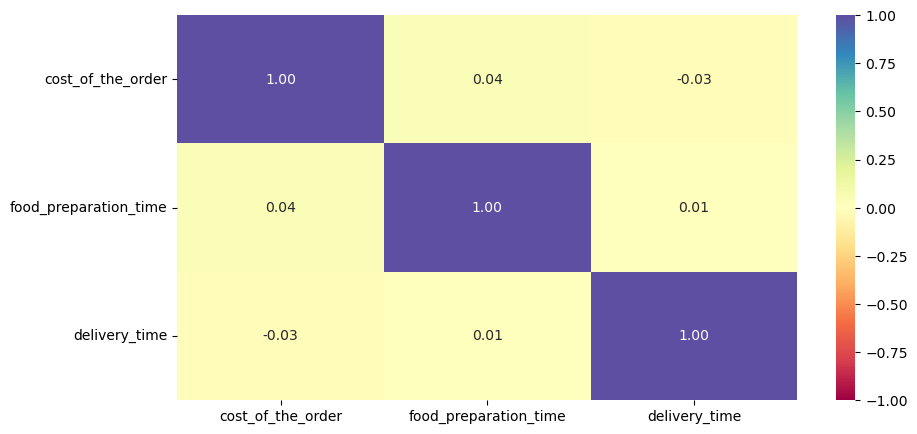

In [29]:
# Plot the heatmap 
plt.figure(figsize=(10,5))
cols = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
sns.heatmap(df[cols].corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1,fmt=".2f");
plt.show()

#### Observations

* No major correlation found between column variables.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [30]:
# Restuarants having a rating count of more than 50 and the average rating should be greater than 4
valid_ratings = df[df['rating']!='Not given'].copy()
valid_ratings['rating'] = valid_ratings['rating'].astype(int)
group_valid_ratings = (valid_ratings.groupby(['restaurant_name'])['rating'].count()).reset_index()
qualify_ratings_count = group_valid_ratings[group_valid_ratings['rating']>50]['restaurant_name'].to_list()
print("Resturants having rating more than 50:","\n",qualify_ratings_count)                                                   

valid_ratings_cp = valid_ratings[valid_ratings['restaurant_name'].isin (qualify_ratings_count)].copy()
group_valid_ratings_cp = (valid_ratings_cp.groupby(['restaurant_name'])['rating'].mean()).reset_index()
qualify_ratings_score = group_valid_ratings_cp[group_valid_ratings_cp['rating']>4]['restaurant_name'].to_list()
print('Resturants meeting promotional criteria:','\n', qualify_ratings_score)

Resturants having rating more than 50: 
 ['Blue Ribbon Fried Chicken', 'Blue Ribbon Sushi', 'Shake Shack', 'The Meatball Shop']
Resturants meeting promotional criteria: 
 ['Blue Ribbon Fried Chicken', 'Blue Ribbon Sushi', 'Shake Shack', 'The Meatball Shop']


#### Observations

* Resturants that have rating more than 50 ratings also qualify for the promotional offer

#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [31]:
# Write the code here
# find out total orders cost > 20 USD for 25% commision
# find out total orders cost > 5 USD & < = 20 for 15% commision
# get the total commission amount for net revenue

fifteen_pr_commision_df = df.loc[(df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] <=20)]
total_fifteen_pr_commision_df = fifteen_pr_commision_df['cost_of_the_order'].sum()
twenty_five_pr_commision_df = df.loc[(df['cost_of_the_order'] >=20)]
total_twenty_five_pr_commision_df = twenty_five_pr_commision_df['cost_of_the_order'].sum()
total_twenty_five_pr_commision_df

revenue_from_fifteen_pr_commision_df = total_fifteen_pr_commision_df * 0.15
revenue_from_twenty_five_pr_commision_df = total_twenty_five_pr_commision_df * 0.25
total_revenue_generated = revenue_from_fifteen_pr_commision_df + revenue_from_twenty_five_pr_commision_df
print("Net revenue generated by the company across all orders is $",total_revenue_generated, sep="")

Net revenue generated by the company across all orders is $6166.303


#### Observations:
* Net revenue generated by the company across all orders is **$6166.30**

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [32]:
# Write the code here
# find out the no of orders that take more than 60 minutes from the time it is ordered(food preparation time + delivery time)
# divide it by total orders no to get the percentage calculation


order_more_than_sixty_mins = df.loc[(df['delivery_time'] + df['food_preparation_time'] > 60)]
no_order_more_than_sixty = order_more_than_sixty_mins.shape[0]
total_no_orders = df.shape[0]

percentage_of_orders_more_than_sisty_mins = (no_order_more_than_sixty/total_no_orders)*100
print("Percentage of orders take more than 60 minutes to get delivered from the time the order is placed is","%.2f" % percentage_of_orders_more_than_sisty_mins)


Percentage of orders take more than 60 minutes to get delivered from the time the order is placed is 10.54


#### Observations:
* Percentage of orders take more than 60 minutes to get delivered from the time the order is placed is 10.54%

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [33]:
# Write the code here
# Find out the mean delivery times of weekdays & Weekends

Weekday_mean = round(df[df['day_of_the_week']=='Weekday']['delivery_time'].mean(),2)
Weekend_mean = round(df[df['day_of_the_week']=='Weekend']['delivery_time'].mean(),2)

print("The weekdays mean delivery time is ",Weekday_mean)
print("The weekends mean delivery time is ",Weekend_mean)

The weekdays mean delivery time is  28.34
The weekends mean delivery time is  22.47


#### Observations:

* Weekdays delivery time is more by 5.87 minutes on average. may be caused due to office hours traffic


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
* There is no correlation between cuisine type and feedback ratings.
* American, Japanese, Italian & Chinese cusine types are doing good with orders volume
 

### Recommendations:
* There is scope in increasing food orders on the weekdays by doing some promotion campaign specific to increase weekday order count.
* 39 % of food ratings are not provided with is a gap in data, so feedback process needs to improve to better understand customer taste & demand
* More focus  or promotion needs to be done for other cuisine type e.g. Korean, Vietnamese, Spanish, etc

---